Author: Murilo Farias

Starting: 2025-10-27

College: CCTB - Canadian College of Technology and Business

Course Title: Data Warehouse (EDW) Concepts


In [1]:
# Import python packages
import streamlit as st
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Needed only once to install the package
#pip install snowflake-connector-python

In [3]:
import snowflake.connector

In [4]:
from dotenv import load_dotenv
import os
# Load environment variables from .env file
load_dotenv()

True

In [5]:
conn = snowflake.connector.connect(
    user=os.getenv('SNOWFLAKE_USER'),
    password=os.getenv('SNOWFLAKE_PASSWORD'),
    account=os.getenv('SNOWFLAKE_ACCOUNT'),
    warehouse=os.getenv('SNOWFLAKE_WAREHOUSE'),
    database=os.getenv('SNOWFLAKE_DATABASE'),
    schema=os.getenv('SNOWFLAKE_SCHEMA')
)

In [6]:
# Load your tables
dim_customer = pd.read_sql("SELECT * FROM DIM_CUSTOMER", conn)
dim_location = pd.read_sql("SELECT * FROM DIM_LOCATION", conn)
dim_device = pd.read_sql("SELECT * FROM DIM_DEVICE", conn)
fact_shopping = pd.read_sql("SELECT * FROM FACT_SHOPPING", conn)

C:\Users\MuriloFarias\AppData\Local\Temp\ipykernel_10324\2185942745.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_customer = pd.read_sql("SELECT * FROM DIM_CUSTOMER", conn)
C:\Users\MuriloFarias\AppData\Local\Temp\ipykernel_10324\2185942745.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_location = pd.read_sql("SELECT * FROM DIM_LOCATION", conn)
C:\Users\MuriloFarias\AppData\Local\Temp\ipykernel_10324\2185942745.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_device = pd.read_sql("SELECT * FROM DIM

In [7]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Auto-detect width
pd.set_option('display.max_colwidth', None) # Show full column content

In [8]:
print("FACT_SHOPPING - First 5 rows")
display(fact_shopping.head(5))

FACT_SHOPPING - First 5 rows


,TRANSACTIONID,CUSTOMERID,LOCATIONID,DEVICEID,VISITDURATION,PAGESVISITED,ITEMSVIEWED,ADCLICKS,CARTADDS,PURCHASE,PURCHASEFLAG
0,1,1,1,1,0.548814,12,2,5,0,1,True
1,2,2,2,2,0.715189,16,2,0,0,1,True
2,3,3,3,2,0.602763,5,4,5,0,1,True
3,4,4,4,1,0.544883,18,7,2,0,1,True
4,5,5,5,2,0.423655,13,6,4,2,1,True


In [9]:
print(fact_shopping.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TRANSACTIONID  2000 non-null   int64  
 1   CUSTOMERID     2000 non-null   int64  
 2   LOCATIONID     2000 non-null   int64  
 3   DEVICEID       2000 non-null   int64  
 4   VISITDURATION  2000 non-null   float64
 5   PAGESVISITED   2000 non-null   int64  
 6   ITEMSVIEWED    2000 non-null   int64  
 7   ADCLICKS       2000 non-null   int64  
 8   CARTADDS       2000 non-null   int64  
 9   PURCHASE       2000 non-null   int64  
 10  PURCHASEFLAG   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(9)
memory usage: 158.3 KB
None


In [10]:
print(fact_shopping.describe())

       TRANSACTIONID   CUSTOMERID   LOCATIONID     DEVICEID  VISITDURATION  \
count    2000.000000  2000.000000  2000.000000  2000.000000    2000.000000   
mean     1000.500000  1000.500000  1000.500000     1.507500       0.503636   
std       577.494589   577.494589   577.494589     0.500069       0.294983   
min         1.000000     1.000000     1.000000     1.000000       0.000367   
25%       500.750000   500.750000   500.750000     1.000000       0.249253   
50%      1000.500000  1000.500000  1000.500000     2.000000       0.501194   
75%      1500.250000  1500.250000  1500.250000     2.000000       0.766804   
max      2000.000000  2000.000000  2000.000000     2.000000       0.999809   

       PAGESVISITED  ITEMSVIEWED    ADCLICKS    CARTADDS     PURCHASE  
count   2000.000000  2000.000000  2000.00000  2000.00000  2000.000000  
mean      10.149000     8.032000     2.47400     1.51450     0.972000  
std        5.739884     4.377392     1.70434     1.09608     0.165014  
min      

In [11]:
total_transactions = len(fact_shopping)
total_purchases = fact_shopping['PURCHASE'].sum()
conversion_rate = (total_purchases / total_transactions) * 100
print("KEY PERFORMANCE INDICATORS (KPIs)")
print(f"Total Transactions: {total_transactions:,}")
print(f"Total Purchases: {total_purchases:,}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

KEY PERFORMANCE INDICATORS (KPIs)
Total Transactions: 2,000
Total Purchases: 1,944
Conversion Rate: 97.20%


In [12]:
print("MISSING VALUES ANALYSIS")
missing = fact_shopping.isnull().sum()
print(missing)

MISSING VALUES ANALYSIS
TRANSACTIONID    0
CUSTOMERID       0
LOCATIONID       0
DEVICEID         0
VISITDURATION    0
PAGESVISITED     0
ITEMSVIEWED      0
ADCLICKS         0
CARTADDS         0
PURCHASE         0
PURCHASEFLAG     0
dtype: int64


In [13]:
print("DEVICE DISTRIBUTION:")
print(fact_shopping['DEVICEID'].value_counts().sort_index())

print("PURCHASE DISTRIBUTION:")
print(fact_shopping['PURCHASE'].value_counts().sort_index())

DEVICE DISTRIBUTION:
DEVICEID
1     985
2    1015
Name: count, dtype: int64
PURCHASE DISTRIBUTION:
PURCHASE
0      56
1    1944
Name: count, dtype: int64


CORRELATION MATRIX


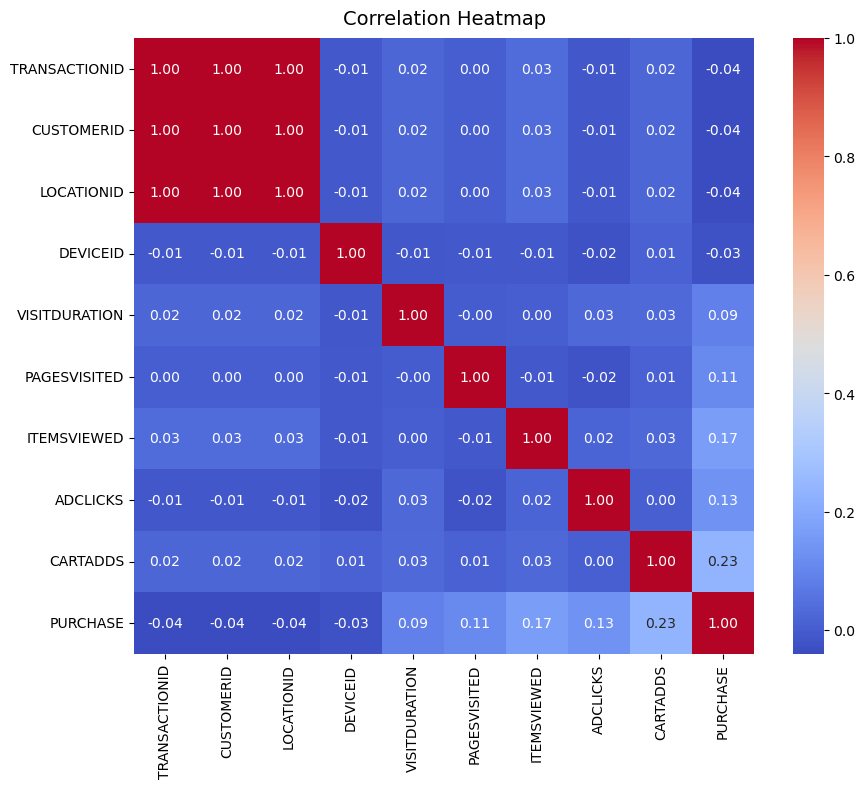

In [14]:
%matplotlib inline

print("CORRELATION MATRIX")
numeric_cols = fact_shopping.select_dtypes(include='number')
correlation = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14, pad=10)
plt.show()

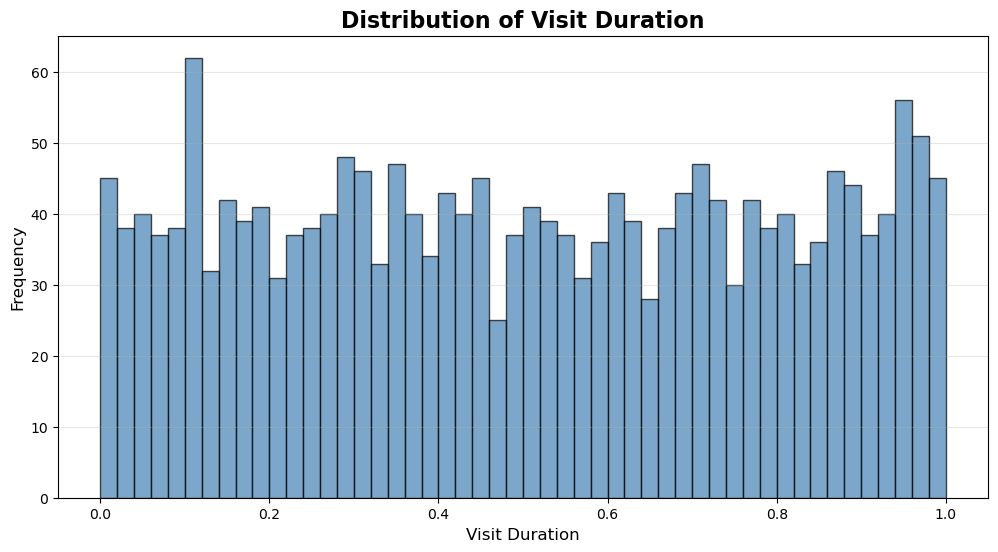

In [15]:
%matplotlib inline

# Distribution of Visit Duration
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(fact_shopping['VISITDURATION'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_title('Distribution of Visit Duration', fontsize=16, fontweight='bold')
ax.set_xlabel('Visit Duration', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.show()  # ← Changed from st.pyplot(fig)

In [16]:
print(dim_customer.head(5))

   CUSTOMERID  AGE  GENDER  AGEGROUP
0           1   35    Male     26-35
1           2   43  Female     36-45
2           3   18  Female  Under 18
3           4   21  Female     18-25
4           5   33    Male     26-35


In [17]:
display(dim_customer.describe())

,CUSTOMERID,AGE
count,2000.000000,2000.000000
mean,1000.500000,33.251000
std,577.494589,9.699177
min,1.000000,16.000000
25%,500.750000,26.000000
50%,1000.500000,33.000000
75%,1500.250000,40.000000
max,2000.000000,64.000000


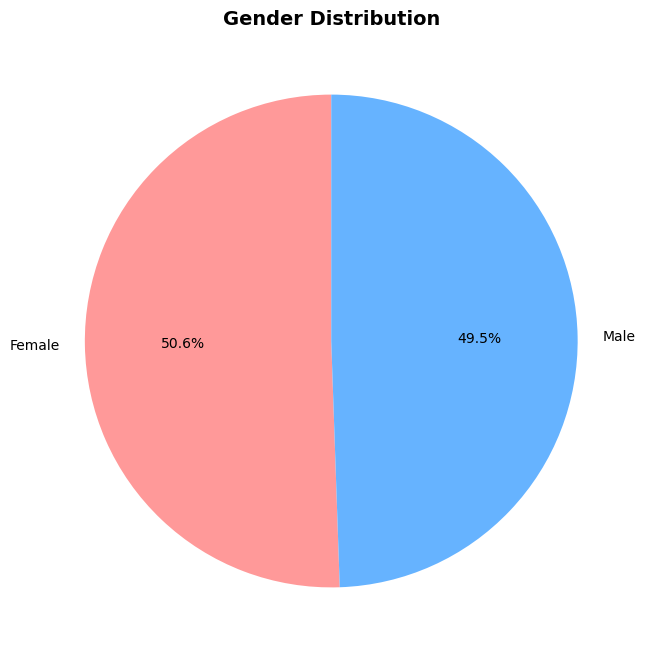

In [18]:
gender_counts = dim_customer['GENDER'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
       startangle=90, colors=['#ff9999', '#66b3ff'])
ax.set_title('Gender Distribution', fontsize=14, fontweight='bold')
plt.show() 

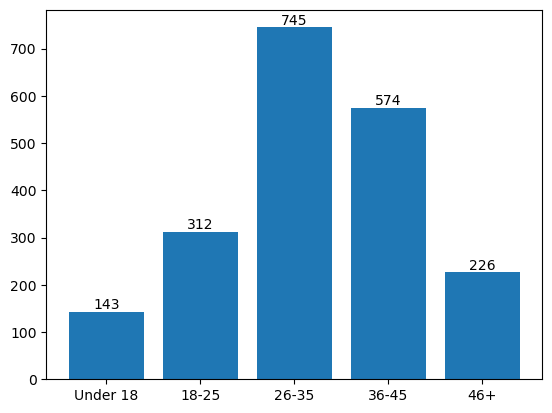

In [19]:
age_counts = dim_customer['AGEGROUP'].value_counts()
age_counts = age_counts.reindex(
    ['Under 18'] + [age for age in sorted(age_counts.index) if age != 'Under 18']
)

fig, ax = plt.subplots()
bars = ax.bar(age_counts.index, age_counts.values)

# Add value labels
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            str(bar.get_height()), ha='center', va='bottom')

plt.show() 

In [20]:
print(dim_device.shape)

(3, 5)


In [21]:
print(dim_device)

   DEVICEID DEVICETYPE DEVICECATEGORY      OS_TYPE            SCREENSIZE
0         1    Desktop       Computer  Windows/Mac    Large (>15 inches)
1         2     Mobile     Smartphone  iOS/Android     Small (<6 inches)
2         3     Tablet  Tablet Device  iOS/Android  Medium (7-12 inches)


In [22]:
print(dim_location.shape)

(2000, 11)


In [23]:
print(dim_location.columns)

Index(['LOCATIONID', 'CUSTOMERID', 'ADDRESS', 'NEIGHBORHOOD', 'CITY', 'REGION',
       'PROVINCE', 'POSTALCODE', 'LATITUDE', 'LONGITUDE', 'LATLONG'],
      dtype='object')


In [24]:
display(dim_location.head(5))

,LOCATIONID,CUSTOMERID,ADDRESS,NEIGHBORHOOD,CITY,REGION,PROVINCE,POSTALCODE,LATITUDE,LONGITUDE,LATLONG
0,1,1,5291 Victoria Dr,Metrotown Area,Burnaby,Metro Vancouver,British Columbia,V5J9Y 6N7,49.240734,-122.986985,"49.24073446052771, -122.98698499583253"
1,2,2,8422 Fraser St,Metrotown Area,Burnaby,Metro Vancouver,British Columbia,V5B7P 5B4,49.242148,-122.994785,"49.242148, -122.994785"
2,3,3,6496 Cherry Lane,Metrotown Area,Burnaby,Metro Vancouver,British Columbia,V5W9V 2P6,49.238544,-122.987680,"49.23854399154932, -122.98768030459246"
3,4,4,3656 Robson St,City Centre,Surrey,Metro Vancouver,British Columbia,V3J4L 6X3,49.185345,-122.839159,"49.18534476764444, -122.83915939977346"
4,5,5,7613 Victoria Dr,Uptown,New Westminster,Metro Vancouver,British Columbia,V3B3T 6P7,49.210830,-122.911109,"49.21083010341714, -122.91110864428673"


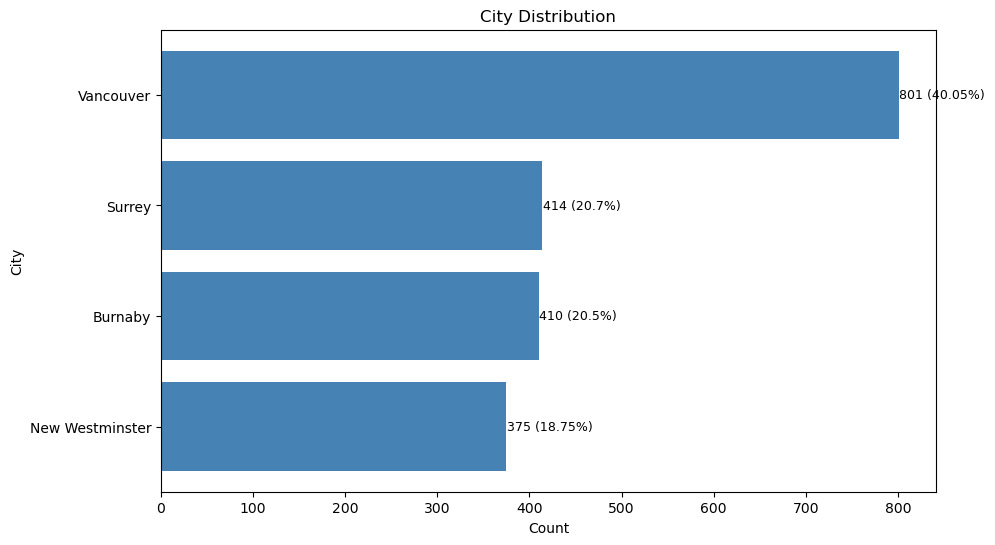

In [25]:
# City counts and percentages
city_counts = dim_location['CITY'].value_counts().sort_values(ascending=True)
city_percentage = (city_counts / len(dim_location) * 100).round(2)

# Horizontal bar chart
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.barh(city_counts.index, city_counts.values, color='steelblue')

# Add value labels (count and percentage)
for bar, pct in zip(bars, city_percentage):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f"{int(bar.get_width())} ({pct}%)", va='center', fontsize=9)

ax.set_title('City Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('City')
plt.show() 

In [26]:
print(dim_location['REGION'].value_counts())

REGION
Metro Vancouver    1199
Vancouver City      801
Name: count, dtype: int64


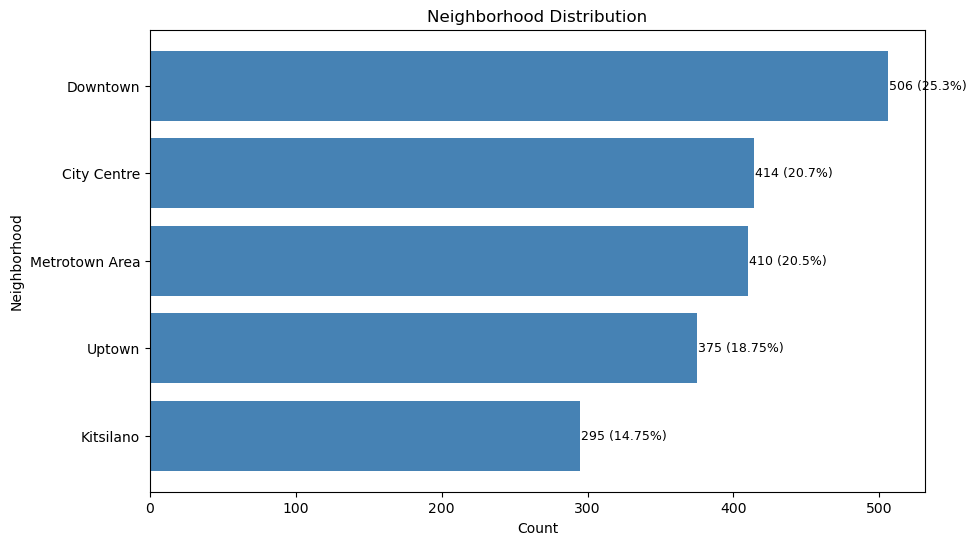

In [27]:
# Neighborhood counts and percentages
neigh_counts = dim_location['NEIGHBORHOOD'].value_counts().sort_values(ascending=True)
neigh_percentage = (neigh_counts / len(dim_location) * 100).round(2)

# Horizontal bar chart
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.barh(neigh_counts.index, neigh_counts.values, color='steelblue')

# Add value labels (count and percentage)
for bar, pct in zip(bars, neigh_percentage):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f"{int(bar.get_width())} ({pct}%)", va='center', fontsize=9)

ax.set_title('Neighborhood Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Neighborhood')
plt.show() 

In [28]:
# Close
conn.close()